# Asingment 2 
**Demetrios Orton-Hatzis** 

**ID: 20368001**

Sunday the 2nd of April, 2023

Problem: 

$$ \dot{x} = \begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix} = f(x,u) = \begin{bmatrix} \cos{\theta} & 0 \\ \sin{\theta} & 0 \\ \frac{\sin(\phi)}{a*\cos(\phi)+b} & \frac{b}{a*\cos(\phi)+b}  \\ 0&1 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} \quad Where: \begin{cases} x = (x,y,\theta,\phi)\in R^2 x S^1 x \begin{bmatrix} \frac{-44\pi}{180}, \frac{44\pi}{180} \end{bmatrix} \\ v_1 \in R^2 \,is \, the\,vehicle's\,speed\,[m/s]\,at\,point\,pF = (x, y ) \in R^2 \\ v_2 \in R\,is\,the\,steering\,rate\,[rad/s] \end{cases} $$

### 1. [2 marks] Write an approximate discrete-time model for this vehicle model with time step T > 0 [s] that you can use for estimator design and simulation.

$$ x_{k+1} = f(x_k,u_k) + w_k \quad Where: w_k\; is\; noise.$$
$$ y_{k+1} = h(x_k) + v_k \quad \quad \quad \quad \quad \quad v_k\; is\; noise.$$


### 2. [8 marks] Consider the following scenario:

#### (a) The vehicle is equipped with a speedometer that measures the speed $v_1 \in R$ of point $p_F$ with assumed noise model $n_v\, \tilde{=} \, N(0, \sigma^2_v ).$

pseudocode: 

    def Noisy_speed(x, V_sigma = 0.025):
        return x + V_sigma * np.random.standard_normal()

#### (b) The vehicle is equipped with a high-resolution absolute encoder that measures the angle $\phi$[rad] (i.e., at the articulation joint) with assumed noise model $n_\phi\, \tilde{=} \, N(0, \sigma^2_\phi ).$

pseudocode:

    def Noisy_encode(phi, Phi_sigma = 0.018):
        return phi + Phi_sigma * np.random.standard_normal()

#### (c) A radio receiver on board the vehicle can sense multiple omnidirectional radio transmitters located in the vehicle’s environment, as illustrated in Figure 2. The receiver returns a voltage reading $y_i$ for each transmitter that is a function of the distance $d_i >= 0$ from front point $p_F$ on the vehicle to transmitter $i \in {1, 2, . . . , m}$, where $m > 0$, such that: $$y_i = \alpha e^{-\beta d_i} + n_i \quad (2)$$ $$where\, \alpha, \beta > 0\, are\, constants\, and\, n_i\, \tilde{=} \, N(0, \sigma^2_i ).$$ 

pseudocode:

    def Noisy_Voltage(d, i_sigma = 0.24):
        return d + i_sigma * np.random.standard_normal()

### The actual locations $p_i = (x_i , y_i ) \in R^2, (i = 1, 2, . . . , m)$, of all transmitters are available in advance to the on-board vehicle navigation system (i.e., the vehicle has a prior map). Write the equations for an unscented Kalman filter (UKF) design to recursively estimate the vehicle’s configuration (i.e., for navigation). Show both the necessary a priori and a posteriori update steps needed to properly and fully implement your estimator design.

#### Initial Guess:

$ \quad \hat{x}_0^+ = E(x_0) $

$ \quad P_0^+ = E\left( \left(x_0 - \hat{x}_0^+ \right) \left( x_0 - \hat{x}_0^+ \right)^T \right) $

#### Implemented: 

$ \quad \hat{x}_0^+ \to \left(x,y\right) = \left(5,-5\right) $

#### A Priori Predict:

$ \quad \hat{x}_0^{(i)} = \hat{x}_0^+ + \tilde{x}^i  \quad i=1,2,\, ... 2n$

$ \quad \quad \tilde{x}^{(i)}_{k-1} = \left( \sqrt{n P_{k-1}} \right)_i  \quad i=1,2,\, ... n$

$ \quad \quad \tilde{x}^{(i+n)}_{k-1} = -\left( \sqrt{n P_{k-1}} \right)_i  \quad i=1,2,\, ... n$

$ \quad \hat{x}_k^{(i)} = f\left(  \hat{x}_{k-1}^{(i)}  , \hat{u}_{k-1} \right)$

$ \quad \hat{x}_k^- = \frac{1}{2n} \sum_{i=1}^{2n} \hat{x}_k^{(i)}$ 

$ \quad \hat{P}_k^- = \frac{1}{2n} \sum_{i=1}^{2n} \left( \left(\hat{x}_k^{(i)} - \hat{x}_k^- \right) \left( \hat{x}_k^{(i)} - \hat{x}_k^- \right)^T \right)$ 

#### A Posteriori Update: 

##### A) 

$ \quad \hat{x}_k^{(i)} = \hat{x}_k^- + \tilde{x}^{(i)}  \quad i=1,2,\, ... 2n$

$ \quad \quad \tilde{x}^{(i)} = \left( \sqrt{n P^-_k} \right)_i  \quad i=1,2,\, ... n$

$ \quad \quad \tilde{x}^{(i+n)} = -\left( \sqrt{n P^-_k} \right)_i  \quad i=1,2,\, ... n$

$ \quad \hat{Y}_k^{(i)} = H\left(  \hat{x}_{k}^{(i)} \right)$

$ \quad \hat{Y}_k = \frac{1}{2n} \sum_{i=1}^{2n} \hat{Y}_k^{(i)}$ 

##### B)

$ \quad P_y = \frac{1}{2n} \sum_{i=1}^{2n} \left( \left(\hat{Y}_k^{(i)} - \hat{Y}_k \right) \left( \hat{Y}_k^{(i)} - \hat{Y}_k \right)^T \right)$ 

$ \quad P_{xy} = \frac{1}{2n} \sum_{i=1}^{2n} \left( \left(\hat{x}_k^{(i)} - \hat{x}_k^- \right) \left( \hat{Y}_k^{(i)} - \hat{Y}_k \right)^T \right)$ 

##### c)

$ \quad K_k = P_{xy} P_y^{-1}  $

$ \quad \hat{x}_k^+ = \hat{x}_k^- + K_k\left(Y_k - \hat{y}_k \right)  $

$ \quad P_k^+ = P_k^- + K_k P_y K_k^T  $


### 3. [6 marks] Using the values in Table 1, simulate the scenario in Problem 2 by using Python (or MATLAB, or Julia, or whatever tool you prefer) for the cases where there is: (i) One (ii) Two (iii) Five  (iv) 10 transmitters in the vehicle's vicinity. $$ $$ Initialize your estimator with a different configuration than that of the actual vehicle and drive the vehicle around as you see fit. Submit plots of your estimation errors as well as your documented source code.

In [5]:
from agvExamples import motbotpy
from agvExamples import A2_Pivot_UKF as UKF
UKF.main(1,25)

ImportError: cannot import name 'motbotpy' from 'agvExamples' (unknown location)

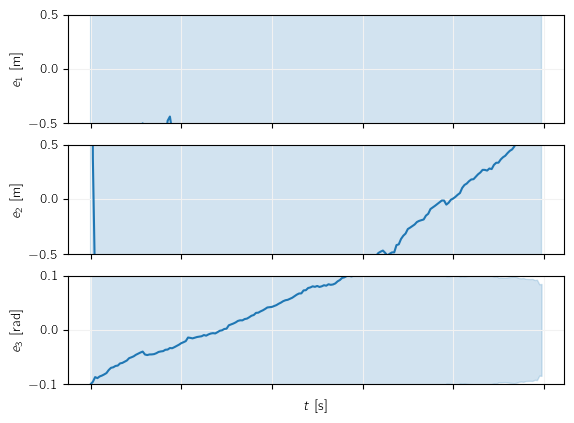

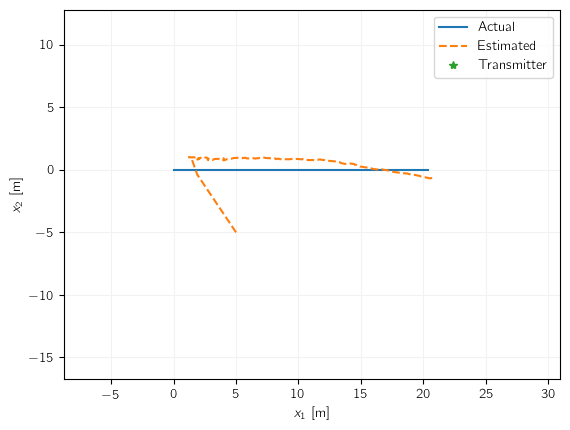

In [154]:
UKF.main(2,25)

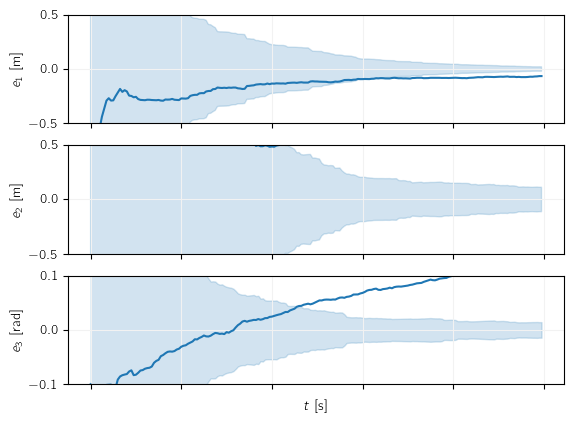

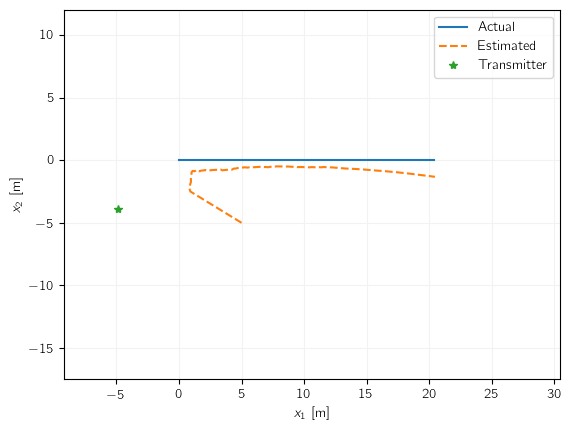

In [155]:
UKF.main(5,25)

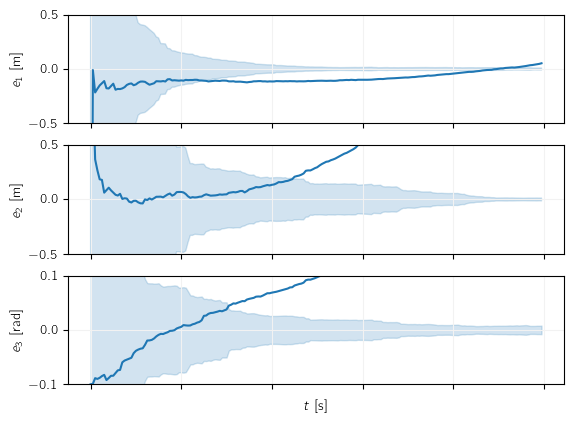

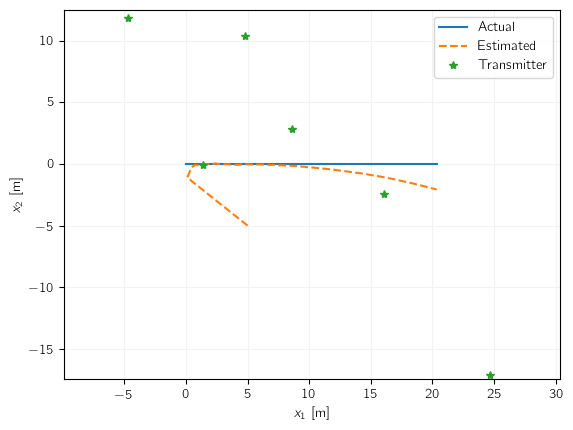

In [156]:
UKF.main(10,25)

### 4. [2 marks] What do you assert is the minimum number of transmitters m > 0 for your estimator to be effective? Briefly justify your assertion (but you do not need to formally prove this).

#### Answer: 

The minimum number of transmitters needed to be effective in two dimensional space is 3, assuming the transmitters are close enough to minimize the effect of noise. My reasoning is can be visuallized as three overlapping circles, where the center of each circle is a transmitter, the radius is the signal strength(including noise). The line traced by each circle is a possible location for the vehicle receiver. The intersection of two circles give two points of possibility, whereas the intersection of three circles gives only a single point.  

### 5. [2 marks] Aside from some high accuracy GNSS system, suggest one additional sensor that might be easily added to improve the performance of this navigation system. Briefly justify your answer. You could demonstrate using simulation, but this is not necessary.

##### Answer: 

The addition of a second radio receiver on the back half of the pivot vehicle would allow the navigation system to triangulate each beacon/feature more easily, there by reducing the uncertainty of each estimated feature location. Using the example of intersecting circles from above, the adition of a second receiver would introduce a pair of circles for each transmitter, thus only two transmitters would be necessary to operate effectively.

Another possibility is to add a magnetic compass which would add a consistent refrence frame to compare with, therefore making it easier to locate features. 

### 6. [0 marks] For extra learning, if you have time, try this design problem using a EKF!